<a href="https://colab.research.google.com/github/diegortiz6685/Portafolio/blob/main/Proyecto_Integrador_de_Datos_(Python%2BPowerBI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Subir archivo manualmente (ejecuta y selecciona tu CSV)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Proyecto Final/datos_ventas (1) - datos_ventas (1).csv')
display(df)


,ID_Venta,Fecha,Tienda,Región,Producto,Categoría,Cantidad,Precio_Unitario,Descuento,Canal,Cliente_ID,Costo_Unitario,Ingresos,Margen
0,V000001,2024-11-07,T020,Andina,Cafetera,Hogar,2,335500.0,263.000,Online,C017560,124140.0,494527.00,246247.00
1,V000002,2025-06-17,T004,Bogotá,Gorra,Ropa,3,40250.0,0.200,NaN,C007036,19320.0,96600.00,38640.00
2,V000003,2025-02-01,T002,Bogotá,Portátil,Electrónica,3,3157240.0,0.200,Tienda,C002973,568300.0,7577376.00,5872476.00
3,V000004,2024-12-03,T019,Pacífica,Café 500g,Alimentos,3,25220.0,0.250,Marketplace,C007316,13870.0,56745.00,15135.00
4,V000005,2024-10-26,T014,Orinoquía,Smartwatch,Electrónica,2,595000.0,0.300,Online,C007245,148750.0,833000.00,535500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,V002623,2025-07-26,T011,Caribe,Jeans,Ropa,5,122160.0,0.200,Tienda,C013868,45200.0,488640.00,262640.00
5001,V001073,2024-12-26,T013,Pacífica,Plancha de Cabello,Belleza,2,192910.0,2.582,Online,C007502,69450.0,286201.28,147301.28
5002,V001481,2025-06-11,T018,Caribe,Crema Hidratante,Belleza,6,67220.0,0.300,Online,C014307,33610.0,282324.00,80664.00
5003,V001357,2025-06-07,T016,Bogotá,Smartwatch,Electrónica,4,604440.0,0.200,Tienda,C013544,151110.0,1934208.00,1329768.00


Validación Inicial y Data Profiling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Venta         5005 non-null   object 
 1   Fecha            5005 non-null   object 
 2   Tienda           5005 non-null   object 
 3   Región           5005 non-null   object 
 4   Producto         5005 non-null   object 
 5   Categoría        5005 non-null   object 
 6   Cantidad         5005 non-null   int64  
 7   Precio_Unitario  5005 non-null   float64
 8   Descuento        4930 non-null   float64
 9   Canal            4955 non-null   object 
 10  Cliente_ID       5005 non-null   object 
 11  Costo_Unitario   5005 non-null   float64
 12  Ingresos         5005 non-null   float64
 13  Margen           5005 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 547.6+ KB


,0
ID_Venta,0
Fecha,0
Tienda,0
Región,0
Producto,0
Categoría,0
Cantidad,0
Precio_Unitario,0
Descuento,75
Canal,50


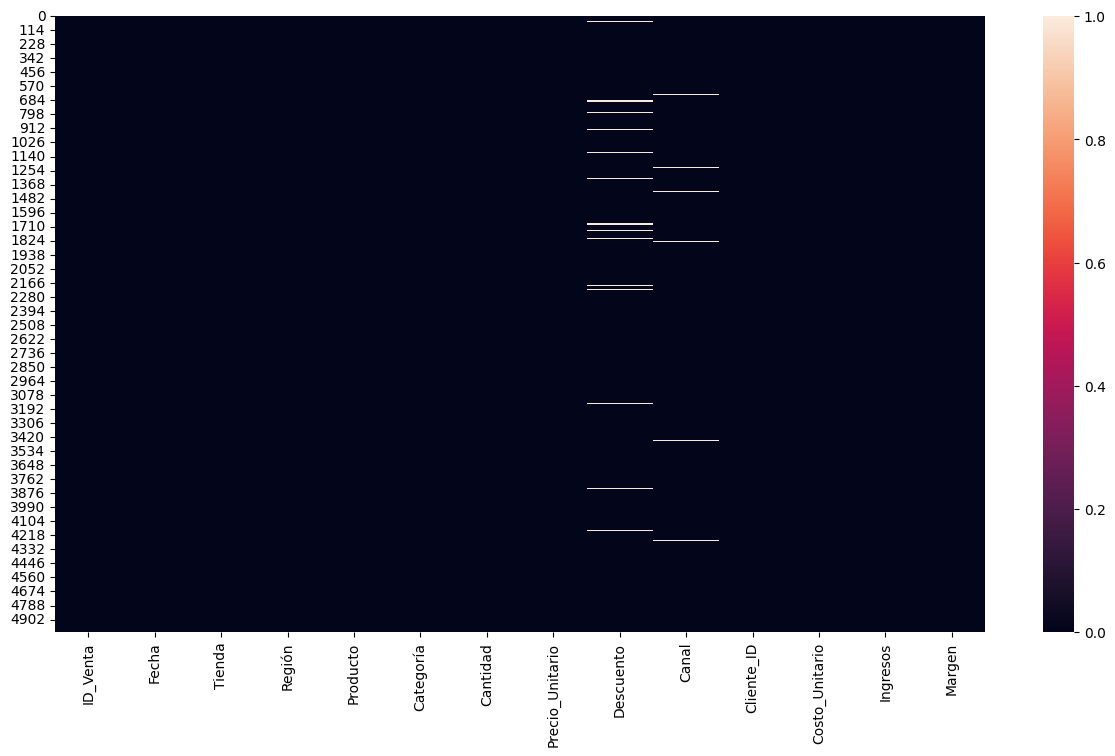

In [ ]:
#Visualización de la estructura, tipos de datos, nulos y primeras métricas
df.info()

#Identificación de datos nulos en cada columna
df_nulos = df.isnull().sum()
display(df_nulos)

plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()


Limpieza y Preparación

In [ ]:
#Cambiar tipo de dato de la fecha de object a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

#Ajustar Descuentos fuera del rango
condicion = (df['Descuento'] > 500)
df.loc[condicion, 'Descuento'] = df['Descuento'] / 10000
condicion2 = (df['Descuento'] > 100)
df.loc[condicion2, 'Descuento'] = df['Descuento'] / 1000
condicion3 = (df['Descuento'] > 1)
df.loc[condicion3, 'Descuento'] = df['Descuento'] / 10

df['Descuento'] = df['Descuento'].fillna(0.0).clip(lower=0,upper=0.5)

#Eliminar nulos de la columna Canal
df['Canal'] = df['Canal'].replace(np.nan, 'Desconocido')
df.info()

df['Ingresos'] = (df['Precio_Unitario']*df['Cantidad'])-(df['Precio_Unitario']*df['Cantidad']*df['Descuento'])
df['Margen'] = df['Ingresos']-(df['Costo_Unitario']*df['Cantidad'])

print("\nLa Base de Datos Ajustada: \n")
display(df.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_Venta         5005 non-null   object        
 1   Fecha            5005 non-null   datetime64[ns]
 2   Tienda           5005 non-null   object        
 3   Región           5005 non-null   object        
 4   Producto         5005 non-null   object        
 5   Categoría        5005 non-null   object        
 6   Cantidad         5005 non-null   int64         
 7   Precio_Unitario  5005 non-null   float64       
 8   Descuento        5005 non-null   float64       
 9   Canal            5005 non-null   object        
 10  Cliente_ID       5005 non-null   object        
 11  Costo_Unitario   5005 non-null   float64       
 12  Ingresos         5005 non-null   float64       
 13  Margen           5005 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(

,ID_Venta,Fecha,Tienda,Región,Producto,Categoría,Cantidad,Precio_Unitario,Descuento,Canal,Cliente_ID,Costo_Unitario,Ingresos,Margen
0,V000001,2024-11-07,T020,Andina,Cafetera,Hogar,2,335500.0,0.263,Online,C017560,124140.0,494527.00,246247.00
1,V000002,2025-06-17,T004,Bogotá,Gorra,Ropa,3,40250.0,0.200,Desconocido,C007036,19320.0,96600.00,38640.00
2,V000003,2025-02-01,T002,Bogotá,Portátil,Electrónica,3,3157240.0,0.200,Tienda,C002973,568300.0,7577376.00,5872476.00
3,V000004,2024-12-03,T019,Pacífica,Café 500g,Alimentos,3,25220.0,0.250,Marketplace,C007316,13870.0,56745.00,15135.00
4,V000005,2024-10-26,T014,Orinoquía,Smartwatch,Electrónica,2,595000.0,0.300,Online,C007245,148750.0,833000.00,535500.00
5,V000006,2024-12-13,T002,Bogotá,Bicicleta MTB,Deportes,4,1935130.0,0.200,Tienda,C017718,348320.0,6192416.00,4799136.00
6,V000007,2025-09-15,T004,Bogotá,Guantes Gimnasio,Deportes,1,43410.0,0.300,Desconocido,C005923,19530.0,30387.00,10857.00
7,V000008,2025-04-09,T004,Bogotá,Cuerda de Salto,Deportes,3,28750.0,0.300,Online,C003193,13800.0,60375.00,18975.00
8,V000009,2025-08-13,T019,Pacífica,Secador de Cabello,Belleza,1,169040.0,0.106,Online,C006749,64240.0,151121.76,86881.76
9,V000010,2025-03-10,T012,Pacífica,Maquillaje Base,Belleza,2,81260.0,0.200,Tienda,C015257,36570.0,130016.00,56876.00


Ingeniería de Variables Básicas

In [ ]:
#Mes y Año
df['Mes_Año'] = df['Fecha'].dt.strftime('%Y-%m')

#Columna Tiquet Promedio
for Cantidad in df['Cantidad']:
  if Cantidad > 0:
    df['Tiquet_Promedio'] = df['Ingresos']/df['Cantidad']
  else:
    df['Tiquet_Promedio'] = 0

display(df.head(10))

,ID_Venta,Fecha,Tienda,Región,Producto,Categoría,Cantidad,Precio_Unitario,Descuento,Canal,Cliente_ID,Costo_Unitario,Ingresos,Margen,Mes_Año,Tiquet_Promedio
0,V000001,2024-11-07,T020,Andina,Cafetera,Hogar,2,335500.0,0.263,Online,C017560,124140.0,494527.00,246247.00,2024-11,247263.50
1,V000002,2025-06-17,T004,Bogotá,Gorra,Ropa,3,40250.0,0.200,Desconocido,C007036,19320.0,96600.00,38640.00,2025-06,32200.00
2,V000003,2025-02-01,T002,Bogotá,Portátil,Electrónica,3,3157240.0,0.200,Tienda,C002973,568300.0,7577376.00,5872476.00,2025-02,2525792.00
3,V000004,2024-12-03,T019,Pacífica,Café 500g,Alimentos,3,25220.0,0.250,Marketplace,C007316,13870.0,56745.00,15135.00,2024-12,18915.00
4,V000005,2024-10-26,T014,Orinoquía,Smartwatch,Electrónica,2,595000.0,0.300,Online,C007245,148750.0,833000.00,535500.00,2024-10,416500.00
5,V000006,2024-12-13,T002,Bogotá,Bicicleta MTB,Deportes,4,1935130.0,0.200,Tienda,C017718,348320.0,6192416.00,4799136.00,2024-12,1548104.00
6,V000007,2025-09-15,T004,Bogotá,Guantes Gimnasio,Deportes,1,43410.0,0.300,Desconocido,C005923,19530.0,30387.00,10857.00,2025-09,30387.00
7,V000008,2025-04-09,T004,Bogotá,Cuerda de Salto,Deportes,3,28750.0,0.300,Online,C003193,13800.0,60375.00,18975.00,2025-04,20125.00
8,V000009,2025-08-13,T019,Pacífica,Secador de Cabello,Belleza,1,169040.0,0.106,Online,C006749,64240.0,151121.76,86881.76,2025-08,151121.76
9,V000010,2025-03-10,T012,Pacífica,Maquillaje Base,Belleza,2,81260.0,0.200,Tienda,C015257,36570.0,130016.00,56876.00,2025-03,65008.00


Análisis Exploratorio


Los Ingresos por Región son:

Región
Amazonía     1.932407e+08
Andina       1.304493e+09
Bogotá       1.220680e+09
Caribe       1.077362e+09
Orinoquía    2.879557e+08
Pacífica     7.000678e+08
Name: Ingresos, dtype: float64

Los Ingresos por Categoría son:

Categoría
Alimentos      7.834057e+07
Belleza        2.941809e+08
Deportes       8.585664e+08
Electrónica    2.613679e+09
Hogar          6.579277e+08
Ropa           2.811054e+08
Name: Ingresos, dtype: float64

El Top 10 de Productos es:



,Ingresos
Producto,
Portátil,1.222774e+09
Bicicleta MTB,7.518768e+08
Smartphone,6.541759e+08
Tablet,4.371425e+08
Smartwatch,2.574021e+08
Aspiradora,2.113032e+08
Freidora de Aire,1.654969e+08
Cafetera,1.193133e+08
Tenis,1.132397e+08



Gráfico de Barras Apiladas



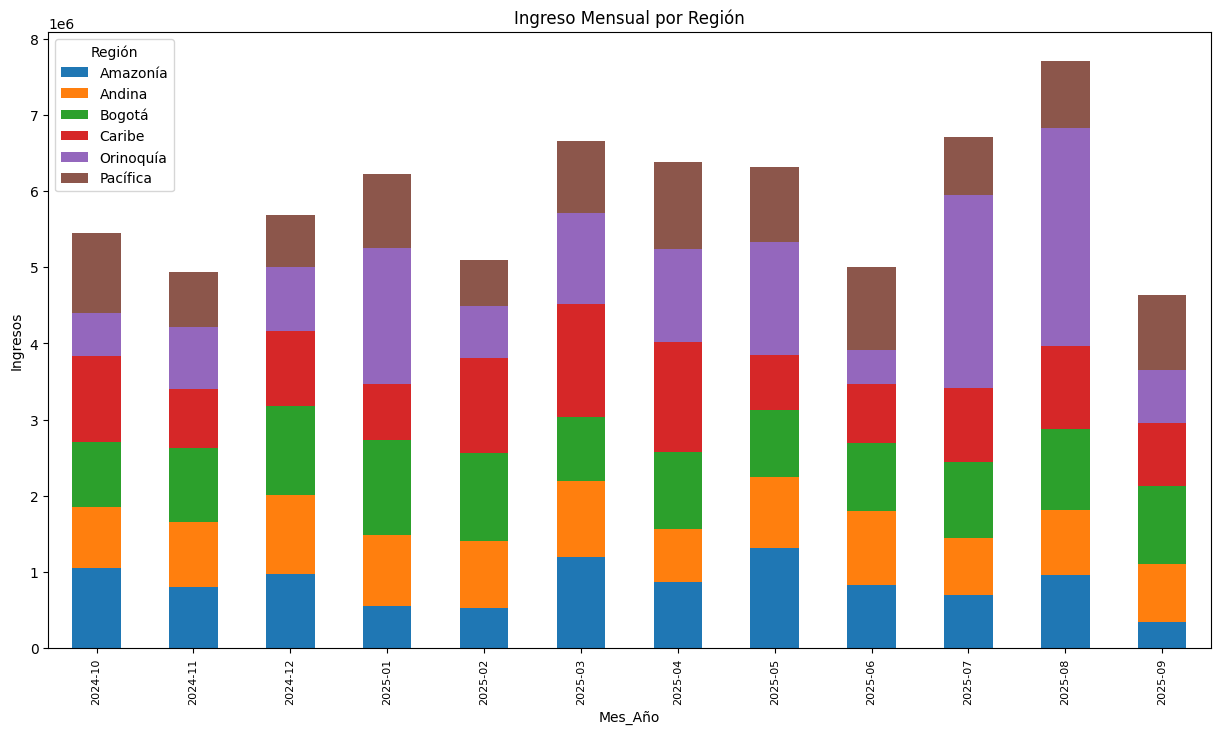


Gráfico de Barras Apiladas



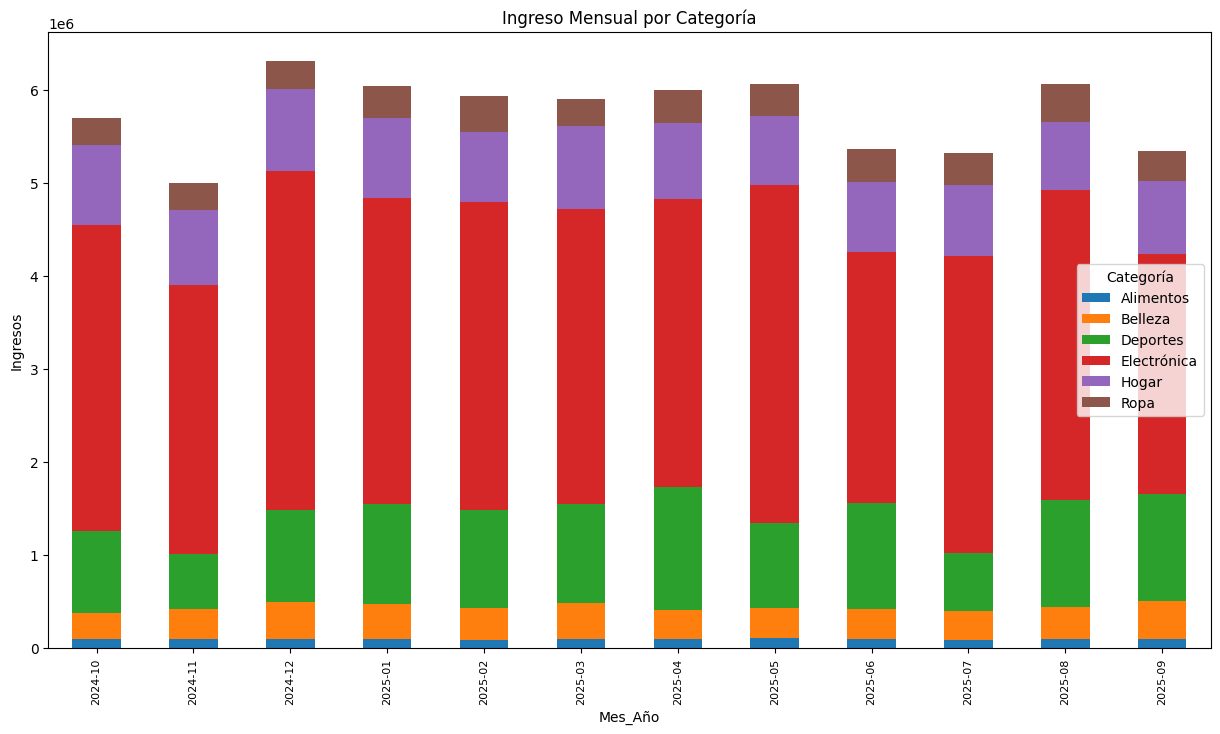

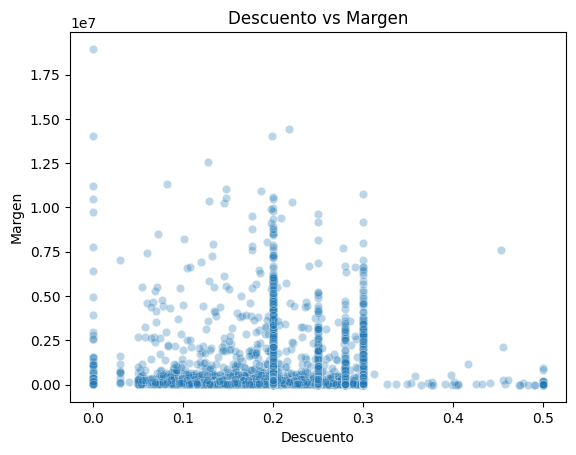

In [ ]:
#Ventas por Región
suma_reg = df.groupby('Región')['Ingresos'].sum()
print("\nLos Ingresos por Región son:\n")
print(suma_reg)

#Ventas por Categoría
suma_cat = df.groupby('Categoría')['Ingresos'].sum()
print("\nLos Ingresos por Categoría son:\n")
print(suma_cat)

#Top 10 Productos
top_prod = df.groupby('Producto')['Ingresos'].sum().sort_values(ascending=False).head(10)
print("\nEl Top 10 de Productos es:\n")
display(top_prod)

#Serie Temporal Mensual por Región
ing_region = df.groupby(['Región','Mes_Año'])['Ingresos'].mean().reset_index()
pvt = ing_region.pivot(index='Mes_Año', columns='Región', values='Ingresos')
pvt.plot(kind='bar', alpha = 1, stacked=True)
plt.title('Ingreso Mensual por Región')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Ingresos')
plt.gcf().set_size_inches(15, 8)
print("\nGráfico de Barras Apiladas\n")
plt.show()

#Serie Temporal Mensual por Categoría
ing_cat = df.groupby(['Categoría','Mes_Año'])['Ingresos'].mean().reset_index()
pvt = ing_cat.pivot(index='Mes_Año', columns='Categoría', values='Ingresos')
pvt.plot(kind='bar', alpha = 1, stacked=True)
plt.title('Ingreso Mensual por Categoría')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Ingresos')
plt.gcf().set_size_inches(15, 8)
print("\nGráfico de Barras Apiladas\n")
plt.show()

#Descuento vs Margen
sns.scatterplot(data=df, x ='Descuento',y = 'Margen',alpha=0.3)
#sns.regplot(data=df, x ='Descuento',y = 'Margen')
plt.title('Descuento vs Margen')
plt.show()

Exportar Base de Datos Ajustada

In [ ]:
#Exportar Df como CSV
df.to_csv('datos_ventas_limpios.csv', index=False, header=True)